In [ ]:
#|default_exp app

# Dogs vs Cats

In [3]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isuper()

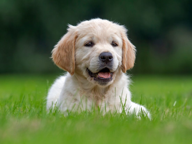

In [4]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [7]:
#|export
learn = load_learner('model.pkl')

In [11]:
%time learn.predict(im)

CPU times: user 263 ms, sys: 16.2 ms, total: 279 ms
Wall time: 59.4 ms


('False', tensor(0), tensor([1.0000e+00, 1.8098e-06]))

In [17]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [18]:
classify_image(im)

{'Dog': 0.9999982118606567, 'Cat': 1.8097750853485195e-06}

In [24]:
#|export
image = gr.Image(shape=(192,192))
label = gr.Label()
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [25]:
m = learn.model

In [26]:
ps = list(m.parameters())

In [27]:
ps[1]

Parameter containing:
tensor([ 2.3408e-01,  2.6587e-01, -5.1096e-08,  5.1818e-01,  3.4404e-09,
         2.2297e-01,  4.2169e-01,  1.3153e-07,  2.5111e-01,  1.5152e-06,
         3.1659e-01,  2.5025e-01,  3.8055e-01,  1.0862e-05,  2.7550e-01,
         2.3718e-01,  2.4036e-01,  3.9596e-01,  4.6966e-01,  2.9133e-01,
         2.7172e-01,  2.7904e-01,  2.9117e-01,  2.0574e-01,  2.5960e-01,
         2.7856e-01,  2.9074e-01,  3.1667e-01,  3.8668e-01,  3.0425e-01,
         2.6652e-01,  2.1014e-01,  2.8628e-01,  3.3319e-01,  4.2658e-01,
         3.7234e-01,  7.4804e-08,  1.8897e-01,  1.4740e-08,  2.2411e-01,
         1.8087e-01,  2.4738e-01,  2.7355e-01,  2.5784e-01,  2.9399e-01,
         3.0021e-01,  2.2358e-01,  2.6351e-01,  2.2001e-08,  2.6645e-01,
         2.2184e-01,  2.8498e-01,  3.3018e-01,  2.2740e-01,  3.6613e-01,
         2.1451e-01,  2.3986e-01,  2.5015e-01,  5.2538e-01,  2.4767e-01,
         2.9586e-01,  2.5802e-01,  4.8333e-01,  2.6571e-01],
       requires_grad=True)

In [28]:
ps[0].shape

torch.Size([64, 3, 7, 7])

In [29]:
ps[0]

Parameter containing:
tensor([[[[-1.0414e-02, -6.1193e-03, -1.8103e-03,  ...,  5.6595e-02,
            1.7035e-02, -1.2777e-02],
          [ 1.1062e-02,  9.5271e-03, -1.0992e-01,  ..., -2.7125e-01,
           -1.2915e-01,  3.6387e-03],
          [-6.9818e-03,  5.9039e-02,  2.9545e-01,  ...,  5.1969e-01,
            2.5625e-01,  6.3470e-02],
          ...,
          [-2.7582e-02,  1.5996e-02,  7.2537e-02,  ..., -3.3289e-01,
           -4.2061e-01, -2.5788e-01],
          [ 3.0571e-02,  4.0921e-02,  6.2802e-02,  ...,  4.1379e-01,
            3.9353e-01,  1.6600e-01],
          [-1.3795e-02, -3.7235e-03, -2.4139e-02,  ..., -1.5074e-01,
           -8.2288e-02, -5.8504e-03]],

         [[-1.1358e-02, -2.6562e-02, -3.4590e-02,  ...,  3.2553e-02,
            6.5556e-04, -2.5786e-02],
          [ 4.5700e-02,  3.3653e-02, -1.0447e-01,  ..., -3.1250e-01,
           -1.6054e-01, -1.3481e-03],
          [-8.3645e-04,  9.8421e-02,  4.0213e-01,  ...,  7.0791e-01,
            3.6884e-01,  1.2448e-01]

# export python file

In [40]:
import nbdev
nbdev.export.nb_export('Exp.2 Dogs v Cats.ipynb')